# Lab 2


## Read and explore data

In [64]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from statsmodels.formula.api import ols
plt.style.use("bmh")


In [65]:
cali_df = pd.read_csv('ST83446_california_housing.csv')


In [66]:
cali_df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  300 non-null    float64
 1   total_rooms         300 non-null    float64
 2   total_bedrooms      300 non-null    float64
 3   population          300 non-null    float64
 4   households          300 non-null    float64
 5   median_income       300 non-null    float64
 6   median_house_value  300 non-null    float64
dtypes: float64(7)
memory usage: 16.5 KB


In [67]:
cali_df.shape

(300, 7)

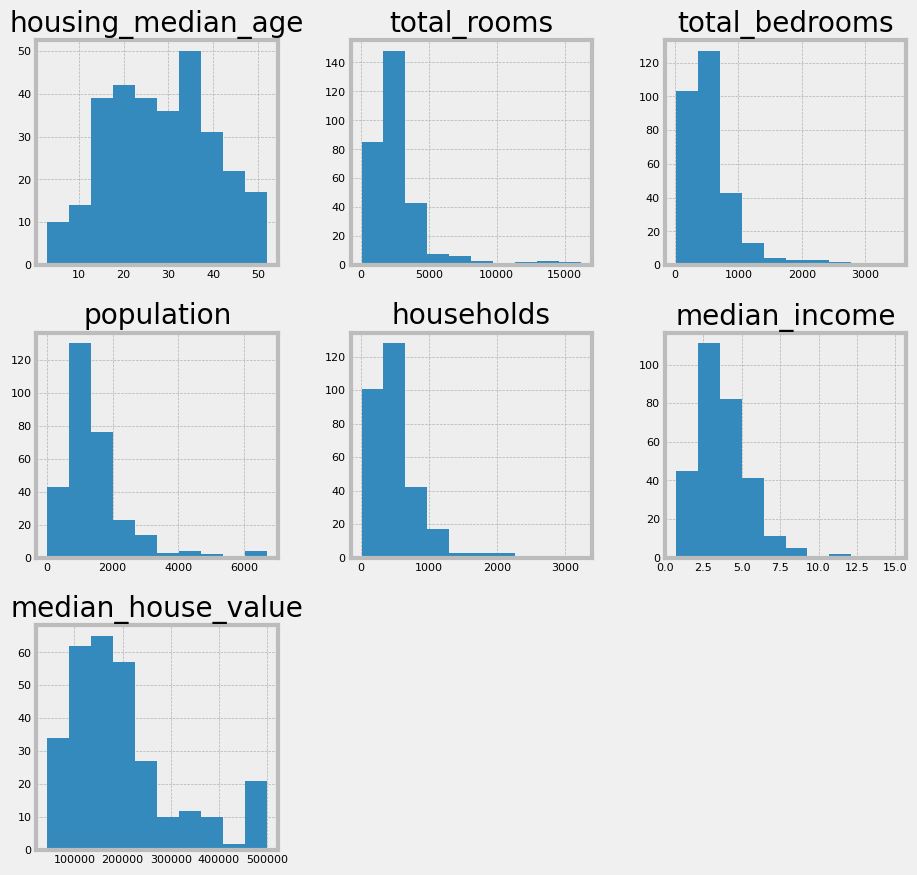

In [68]:
cali_df[cali_df.columns].hist(figsize=(10,10));

In [69]:
cali_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
housing_median_age,300.0,28.34,11.84,3.00,19.00,29.00,36.25,52.0
total_rooms,300.0,2700.71,2267.50,37.00,1516.00,2149.00,3100.00,16222.0
total_bedrooms,300.0,567.14,445.46,10.00,315.50,447.00,682.50,3474.0
population,300.0,1472.68,1056.08,14.00,838.75,1216.00,1762.25,6700.0
households,300.0,525.15,402.46,7.00,297.75,423.50,620.75,3232.0
median_income,300.0,3.78,1.91,0.71,2.53,3.47,4.66,15.0
median_house_value,300.0,199332.06,114547.80,43900.00,120000.00,171900.00,234425.00,500001.0


## Finding clusters

### Dendrograms using L2 and L1 form

In [70]:
S_SIZE = 8
M_SIZE = 12
L_SIZE = 16


plt.rc('font', size=S_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=S_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=M_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=S_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=S_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=S_SIZE)    # legend fontsize
plt.rc('figure', titlesize=L_SIZE)  # fontsize of the figure title

In [71]:
# ward and centroid requires L2
L2_linkage_ward = linkage(cali_df, method='ward', metric='euclidean')
L2_linkage_centroid = linkage(cali_df, method='centroid', metric='euclidean')
L1_linkage_complete = linkage(cali_df, method='complete', metric='cityblock')
L2_linkage_complete = linkage(cali_df, method='complete', metric='euclidean')
L1_linkage_weighted = linkage(cali_df, method='weighted', metric='cityblock')
L2_linkage_weighted = linkage(cali_df, method='weighted', metric='euclidean')

In [72]:
# helper function
def links(variable):
    dendrogram(variable)
    ax = plt.gca()
    ax.tick_params(axis='x', which='major', labelsize=5)
    plt.xticks(ax.get_xticks()[::10]) 
    variable_name = [name for name, value in globals().items() if value is variable][0]
    plt.title(variable_name.split('_')[0] + ' ' + variable_name.split('_')[2])
    plt.show()


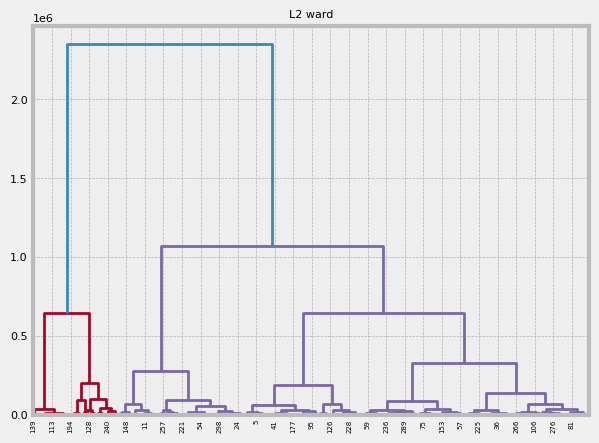

In [73]:
links(L2_linkage_ward)

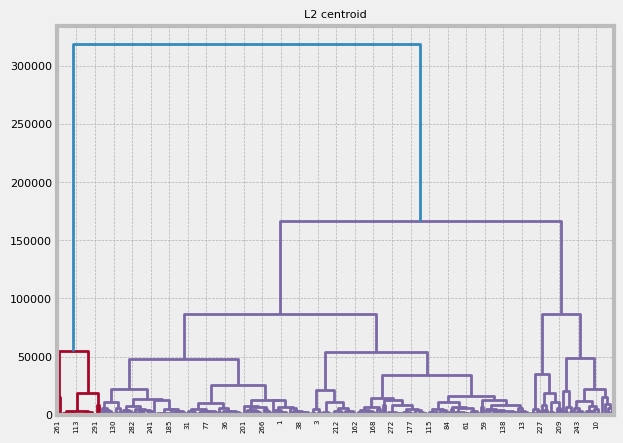

In [74]:
links(L2_linkage_centroid)

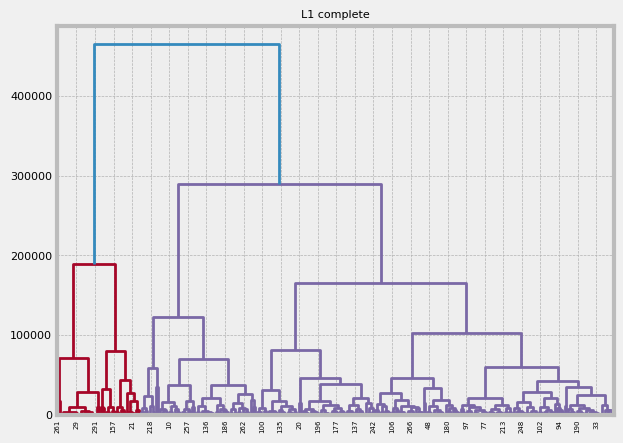

In [75]:
links(L1_linkage_complete)

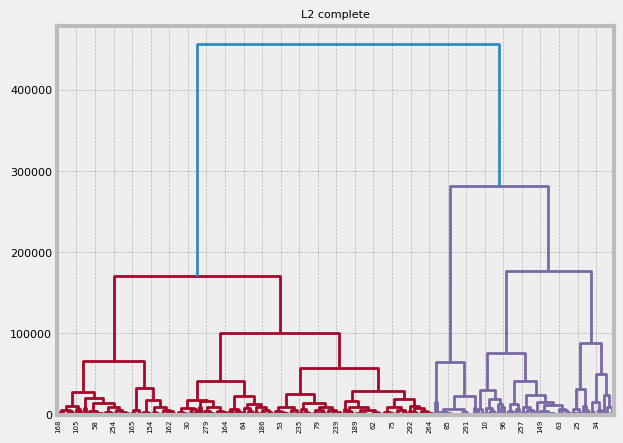

In [76]:
links(L2_linkage_complete)

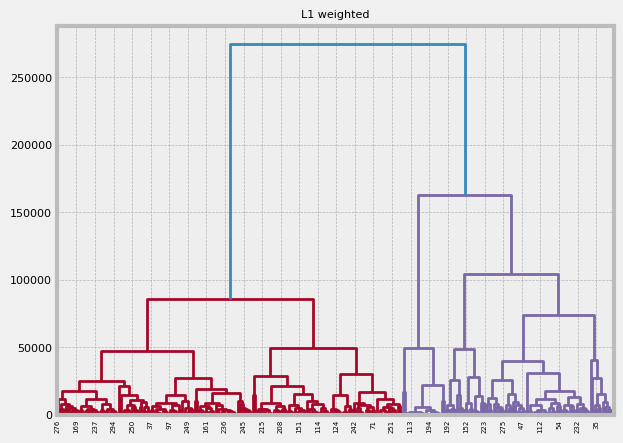

In [77]:
links(L1_linkage_weighted)

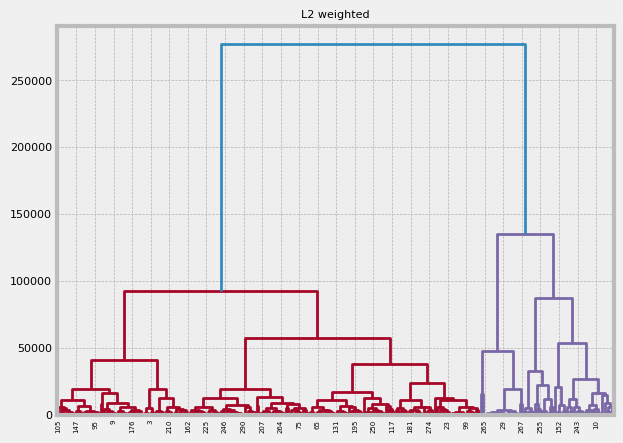

In [78]:
links(L2_linkage_weighted)

### Standardization


In [79]:
scaler = StandardScaler()
mat = cali_df.values 
cali_scaled_df = pd.DataFrame(scaler.fit_transform(mat))
cali_scaled_df.columns = list(cali_df.columns)

In [80]:
cali_scaled_df.head(5)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.902145,-0.282150,0.046898,0.436603,0.111635,-1.263885,-0.894850
1,0.563629,-0.374918,-0.470281,-0.055657,-0.443387,0.258235,-0.225016
2,-1.636725,-0.094847,0.132345,0.441345,-0.000365,-0.869961,-0.419145
3,-0.705806,-1.176698,-1.250547,-1.364554,-1.287120,-1.358581,-1.305844
4,-0.198032,0.368551,0.406675,-0.142916,0.350568,1.779041,2.629219


In [81]:
cali_scaled_df.shape

(300, 7)

In [82]:
scaledL2_linkage_ward = linkage(cali_scaled_df, method='ward', metric='euclidean')
scaledL2_linkage_centroid = linkage(cali_scaled_df, method='centroid', metric='euclidean')
scaledL1_linkage_complete = linkage(cali_scaled_df, method='complete', metric='cityblock')
scaledL2_linkage_complete = linkage(cali_scaled_df, method='complete', metric='euclidean')
scaledL1_linkage_weighted = linkage(cali_scaled_df, method='weighted', metric='cityblock')
scaledL2_linkage_weighted = linkage(cali_scaled_df, method='weighted', metric='euclidean')

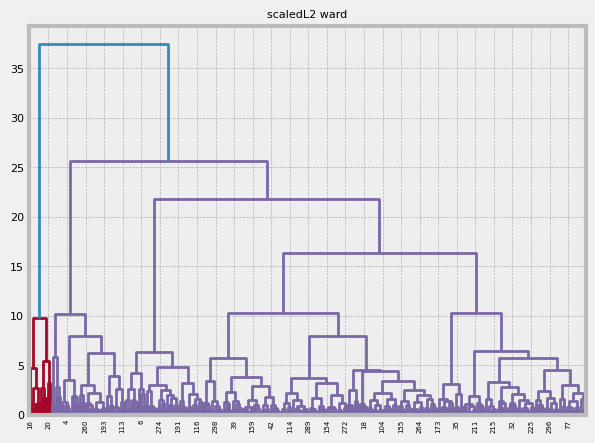

In [83]:
links(scaledL2_linkage_ward)

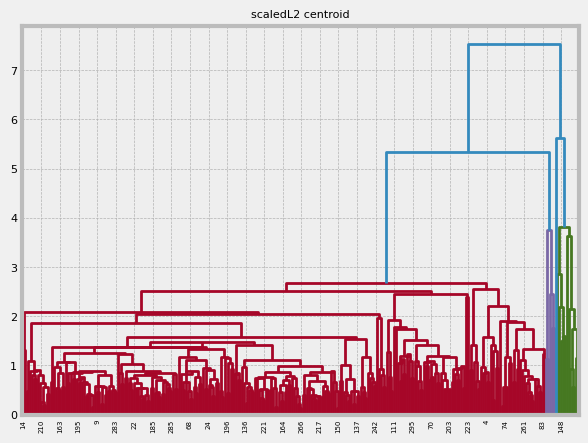

In [84]:
links(scaledL2_linkage_centroid)

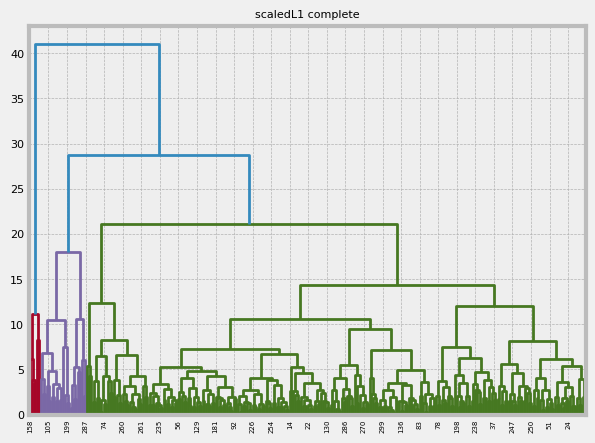

In [85]:
links(scaledL1_linkage_complete)

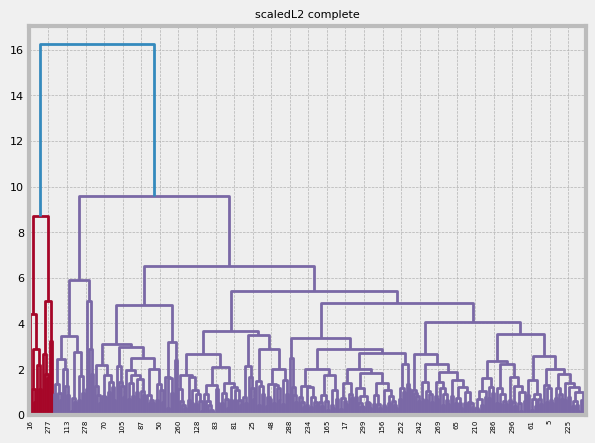

In [86]:
links(scaledL2_linkage_complete)

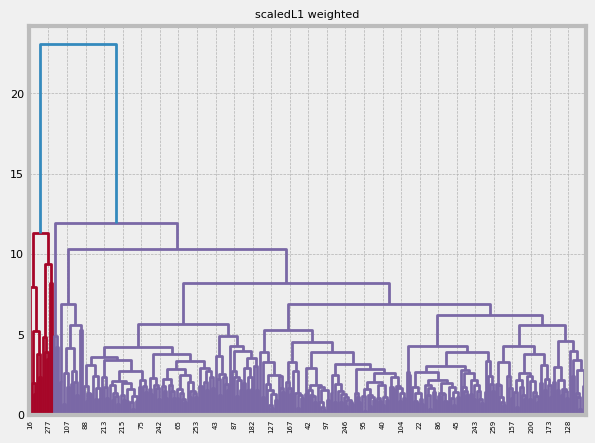

In [87]:
links(scaledL1_linkage_weighted)

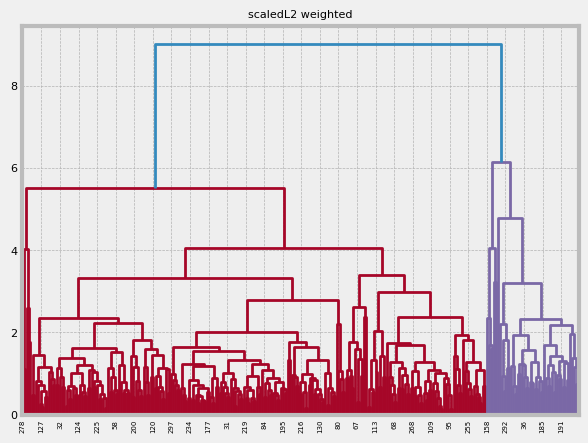

In [88]:
links(scaledL2_linkage_weighted)

## K-means

In [89]:
kmeans_2_clusters = KMeans(
    init = "random",
    n_clusters = 2,
    n_init = 10,
    max_iter = 300,
    random_state = 20
)
kmeans_3_clusters = KMeans(
    init = "random",
    n_clusters = 3,
    n_init = 10,
    max_iter = 300,
    random_state = 20
)
kmeans_4_clusters = KMeans(
    init = "random",
    n_clusters = 4,
    n_init = 10,
    max_iter = 300,
    random_state = 20
)
scaled_kmeans_2_clusters = KMeans(
    init = "random",
    n_clusters = 2,
    n_init = 10,
    max_iter = 300,
    random_state = 20
)
scaled_kmeans_3_clusters = KMeans(
    init = "random",
    n_clusters = 3,
    n_init = 10,
    max_iter = 300,
    random_state = 20
)
scaled_kmeans_4_clusters = KMeans(
    init = "random",
    n_clusters = 4,
    n_init = 10,
    max_iter = 300,
    random_state = 20
)

In [90]:
kmeans_2_clusters.fit(cali_df)
kmeans_3_clusters.fit(cali_df)
kmeans_4_clusters.fit(cali_df)
scaled_kmeans_2_clusters.fit(cali_scaled_df)
scaled_kmeans_3_clusters.fit(cali_scaled_df)
scaled_kmeans_4_clusters.fit(cali_scaled_df)

KMeans(init='random', n_clusters=4, n_init=10, random_state=20)

In [91]:
labels_2_clusters = kmeans_2_clusters.labels_
labels_3_clusters = kmeans_3_clusters.labels_
labels_4_clusters = kmeans_4_clusters.labels_
scaled_labels_2_clusters = scaled_kmeans_2_clusters.labels_
scaled_labels_3_clusters = scaled_kmeans_3_clusters.labels_
scaled_labels_4_clusters = scaled_kmeans_4_clusters.labels_

In [92]:
kmeans_2_clusters.cluster_centers_

array([[3.1960000e+01, 3.0778200e+03, 5.3806000e+02, 1.2353800e+03,
        4.9976000e+02, 6.4819400e+00, 4.1388638e+05],
       [2.7616000e+01, 2.6252840e+03, 5.7296000e+02, 1.5201400e+03,
        5.3022400e+02, 3.2442512e+00, 1.5642120e+05]])

In [93]:
kmeans_2_clusters.n_iter_
kmeans_3_clusters.n_iter_

11

In [94]:
cali_df['labels_2_clusters']=labels_2_clusters
cali_df['labels_3_clusters']=labels_3_clusters
cali_df['labels_4_clusters']=labels_4_clusters
cali_scaled_df['labels_2_clusters']=scaled_labels_2_clusters
cali_scaled_df['labels_3_clusters']=scaled_labels_3_clusters
cali_scaled_df['labels_4_clusters']=scaled_labels_4_clusters


In [95]:
cali_df.head(5)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,labels_2_clusters,labels_3_clusters,labels_4_clusters
0,39.0,2062.0,588.0,1933.0,570.0,1.3801,97000.0,1,1,1
1,35.0,1852.0,358.0,1414.0,347.0,4.2750,173600.0,1,0,0
2,9.0,2486.0,626.0,1938.0,525.0,2.1293,151400.0,1,1,0
3,20.0,37.0,11.0,34.0,8.0,1.2000,50000.0,1,1,1
4,26.0,3535.0,748.0,1322.0,666.0,7.1674,500001.0,0,2,3


In [96]:
cali_df['labels_2_clusters'].value_counts()

labels_2_clusters
1    250
0     50
Name: count, dtype: int64

In [97]:

cali_df['labels_3_clusters'].value_counts()

labels_3_clusters
1    149
0    111
2     40
Name: count, dtype: int64

In [98]:

cali_df['labels_4_clusters'].value_counts()

labels_4_clusters
1    119
0    114
2     44
3     23
Name: count, dtype: int64

In [99]:
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
     "random_state": 20,
  }
 
   # A list holds the SSE values for each k
sse = []
scaled_sse = []
silhouette_coefficients = []
scaled_silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cali_df)
    score = silhouette_score(cali_df, kmeans.labels_)
    silhouette_coefficients.append(score)
    sse.append(kmeans.inertia_)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cali_scaled_df)
    score = silhouette_score(cali_scaled_df, kmeans.labels_)
    scaled_silhouette_coefficients.append(score)
    scaled_sse.append(kmeans.inertia_)

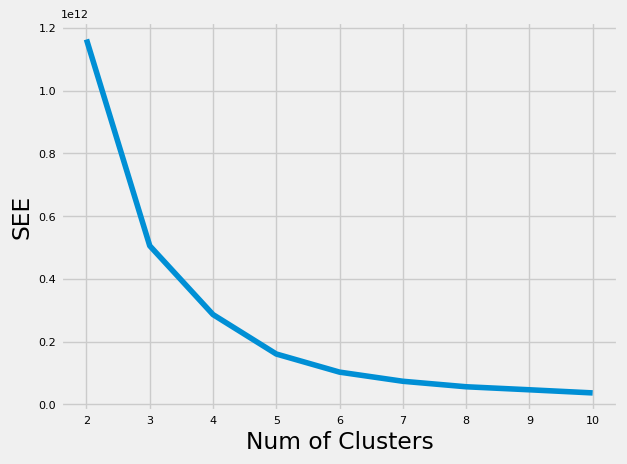

In [100]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11),sse)
plt.xticks(range(2,11))
plt.xlabel("Num of Clusters")
plt.ylabel("SEE")
plt.show()

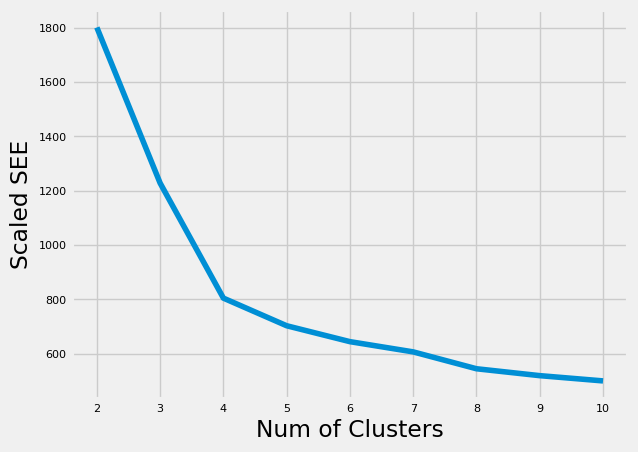

In [101]:
plt.plot(range(2,11),scaled_sse)
plt.xticks(range(2,11))
plt.xlabel("Num of Clusters")
plt.ylabel("Scaled SEE")
plt.show()

In [102]:
kneedle = KneeLocator(range(2,11),sse, curve="convex", direction="decreasing")
kneedle.elbow

4

In [103]:
scaled_kneedle = KneeLocator(range(2,11),scaled_sse,curve="convex", direction="decreasing")
scaled_kneedle.elbow

4

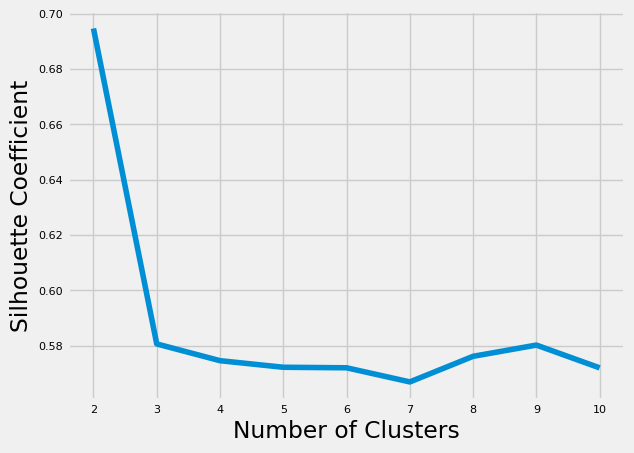

In [104]:
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

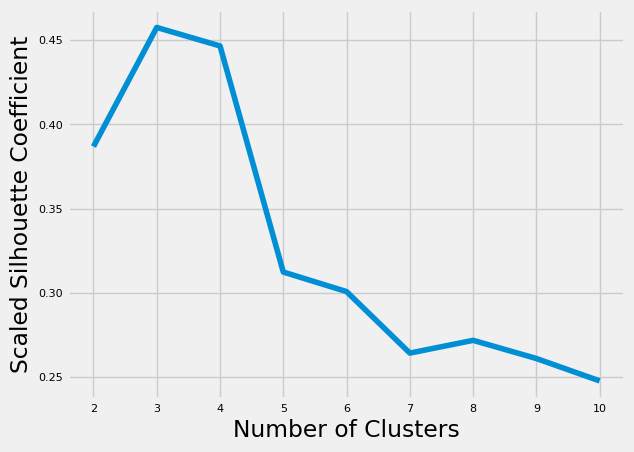

In [105]:
plt.plot(range(2, 11), scaled_silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Scaled Silhouette Coefficient")
plt.show()

## ANOVA Analysis of features

In [106]:
cali_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  300 non-null    float64
 1   total_rooms         300 non-null    float64
 2   total_bedrooms      300 non-null    float64
 3   population          300 non-null    float64
 4   households          300 non-null    float64
 5   median_income       300 non-null    float64
 6   median_house_value  300 non-null    float64
 7   labels_2_clusters   300 non-null    int32  
 8   labels_3_clusters   300 non-null    int32  
 9   labels_4_clusters   300 non-null    int32  
dtypes: float64(7), int32(3)
memory usage: 20.0 KB


In [107]:
cali_scaled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   housing_median_age  300 non-null    float64
 1   total_rooms         300 non-null    float64
 2   total_bedrooms      300 non-null    float64
 3   population          300 non-null    float64
 4   households          300 non-null    float64
 5   median_income       300 non-null    float64
 6   median_house_value  300 non-null    float64
 7   labels_2_clusters   300 non-null    int32  
 8   labels_3_clusters   300 non-null    int32  
 9   labels_4_clusters   300 non-null    int32  
dtypes: float64(7), int32(3)
memory usage: 20.0 KB


In [108]:
cali_scaled_df['labels_3_clusters'].value_counts()

labels_3_clusters
0    238
2     49
1     13
Name: count, dtype: int64

In [109]:

for col in cali_df.columns[:7]:
    print(col)

housing_median_age
total_rooms
total_bedrooms
population
households
median_income
median_house_value


In [156]:
#helper function
def anova_tables(cluster_label, data_frame):
    model = ols(f'{cluster_label} ~ {data_frame.columns[0]}', data=data_frame).fit()
    df_anova =  sm.stats.anova_lm(model,typ=2)
    for i in range(1,7):
        model = ols(f'{cluster_label} ~ {data_frame.columns[i]}', data=data_frame).fit()
        df_anova = pd.concat([df_anova, sm.stats.anova_lm(model,typ=2)])
    df_anova["significant"] = df_anova["PR(>F)"] < .05
    print(cluster_label)
    return df_anova

In [111]:
anova_tables('labels_2_clusters', cali_df)


labels_2_clusters


,sum_sq,df,F,PR(>F),significant
housing_median_age,0.782122,1.0,5.700746,1.758074e-02,True
Residual,40.884545,298.0,NaN,NaN,False
total_rooms,0.231270,1.0,1.663277,1.981615e-01,False
Residual,41.435396,298.0,NaN,NaN,False
total_bedrooms,0.035640,1.0,0.255113,6.138708e-01,False
Residual,41.631027,298.0,NaN,NaN,False
population,0.422150,1.0,3.050122,8.176144e-02,False
Residual,41.244516,298.0,NaN,NaN,False
households,0.033269,1.0,0.238131,6.259184e-01,False
Residual,41.633398,298.0,NaN,NaN,False


In [112]:
model = ols('labels_2_clusters ~ total_rooms', data=cali_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
total_rooms,0.231270,1.0,1.663277,0.198162
Residual,41.435396,298.0,NaN,NaN


In [113]:
model = ols('labels_2_clusters ~ total_bedrooms', data=cali_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
total_bedrooms,0.035640,1.0,0.255113,0.613871
Residual,41.631027,298.0,NaN,NaN


In [114]:
anova_tables('labels_3_clusters', cali_df)

labels_3_clusters


,sum_sq,df,F,PR(>F),significant
housing_median_age,2.416317,1.0,5.464112,2.007273e-02,True
Residual,131.780349,298.0,NaN,NaN,False
total_rooms,0.052336,1.0,0.116265,7.333618e-01,False
Residual,134.144330,298.0,NaN,NaN,False
total_bedrooms,0.176254,1.0,0.391907,5.317777e-01,False
Residual,134.020413,298.0,NaN,NaN,False
population,1.475176,1.0,3.312217,6.976979e-02,False
Residual,132.721491,298.0,NaN,NaN,False
households,0.422154,1.0,0.940403,3.329606e-01,False
Residual,133.774512,298.0,NaN,NaN,False


In [115]:
model = ols('labels_3_clusters ~ total_bedrooms', data=cali_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
total_bedrooms,0.176254,1.0,0.391907,0.531778
Residual,134.020413,298.0,NaN,NaN


In [116]:
anova_tables('labels_4_clusters', cali_df)

labels_4_clusters


,sum_sq,df,F,PR(>F),significant
housing_median_age,3.880362,1.0,4.735257,3.033577e-02,True
Residual,244.199638,298.0,NaN,NaN,False
total_rooms,1.252188,1.0,1.511790,2.198360e-01,False
Residual,246.827812,298.0,NaN,NaN,False
total_bedrooms,0.077153,1.0,0.092707,7.609757e-01,False
Residual,248.002847,298.0,NaN,NaN,False
population,3.089819,1.0,3.758380,5.348750e-02,False
Residual,244.990181,298.0,NaN,NaN,False
households,0.290909,1.0,0.349858,5.546420e-01,False
Residual,247.789091,298.0,NaN,NaN,False


In [117]:
model = ols('labels_4_clusters ~ total_bedrooms', data=cali_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
total_bedrooms,0.077153,1.0,0.092707,0.760976
Residual,248.002847,298.0,NaN,NaN


In [118]:
anova_tables('labels_2_clusters', cali_scaled_df)

labels_2_clusters


,sum_sq,df,F,PR(>F),significant
housing_median_age,0.829664,1.0,21.300933,5.840457e-06,True
Residual,11.607002,298.0,NaN,NaN,False
total_rooms,7.848080,1.0,509.683654,1.749307e-66,True
Residual,4.588587,298.0,NaN,NaN,False
total_bedrooms,7.063695,1.0,391.772192,3.001139e-56,True
Residual,5.372972,298.0,NaN,NaN,False
population,6.525583,1.0,328.979251,4.684999e-50,True
Residual,5.911083,298.0,NaN,NaN,False
households,6.915818,1.0,373.296545,1.732709e-54,True
Residual,5.520849,298.0,NaN,NaN,False


In [157]:
significant_variables_scaled_2 = ["housing_median_age","total_rooms","total_bedrooms", "population","households"]

In [119]:
model = ols('labels_2_clusters ~ total_bedrooms', data=cali_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
total_bedrooms,7.063695,1.0,391.772192,3.001139e-56
Residual,5.372972,298.0,NaN,NaN


In [120]:
anova_tables('labels_3_clusters', cali_scaled_df)

labels_3_clusters


,sum_sq,df,F,PR(>F),significant
housing_median_age,0.290237,1.0,0.515932,4.731448e-01,False
Residual,167.639763,298.0,NaN,NaN,False
total_rooms,8.846041,1.0,16.570622,6.010333e-05,True
Residual,159.083959,298.0,NaN,NaN,False
total_bedrooms,1.954989,1.0,3.510086,6.197488e-02,False
Residual,165.975011,298.0,NaN,NaN,False
population,0.238730,1.0,0.424241,5.153304e-01,False
Residual,167.691270,298.0,NaN,NaN,False
households,2.040446,1.0,3.665409,5.651043e-02,False
Residual,165.889554,298.0,NaN,NaN,False


In [158]:
significant_variables_scaled_3 = ["total_rooms", "median_income","median_house_value"]

In [121]:
model = ols('labels_3_clusters ~ total_bedrooms', data=cali_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)

,sum_sq,df,F,PR(>F)
total_bedrooms,1.954989,1.0,3.510086,0.061975
Residual,165.975011,298.0,NaN,NaN


In [122]:
anova_tables('labels_4_clusters', cali_scaled_df)

labels_4_clusters


,sum_sq,df,F,PR(>F),significant
housing_median_age,20.098675,1.0,15.136305,1.234143e-04,True
Residual,395.697991,298.0,NaN,NaN,False
total_rooms,40.336240,1.0,32.014557,3.591571e-08,True
Residual,375.460427,298.0,NaN,NaN,False
total_bedrooms,32.860910,1.0,25.572308,7.457139e-07,True
Residual,382.935757,298.0,NaN,NaN,False
population,19.645720,1.0,14.778267,1.478472e-04,True
Residual,396.150947,298.0,NaN,NaN,False
households,34.323191,1.0,26.812640,4.132448e-07,True
Residual,381.473475,298.0,NaN,NaN,False


In [164]:
significant_variables_scaled_4 = list(cali_scaled_df.columns[:7])
significant_variables_scaled_4

['housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value']

In [123]:
model = ols('labels_4_clusters ~ total_rooms', data=cali_scaled_df).fit()
sm.stats.anova_lm(model,typ=2)


,sum_sq,df,F,PR(>F)
total_rooms,40.336240,1.0,32.014557,3.591571e-08
Residual,375.460427,298.0,NaN,NaN


after sanitity checks, only housing_median_age, median_income, and median_house_value are significant values

### Visuals for significant values

In [144]:
cluster_labels = ['labels_2_clusters','labels_3_clusters','labels_4_clusters']
significant_variables = ['housing_median_age','median_income','median_house_value',]


/tmp/ipykernel_30671/3668785164.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[0], y=significant_variables[0], data=cali_df, palette='spring')


<Axes: xlabel='labels_2_clusters', ylabel='housing_median_age'>

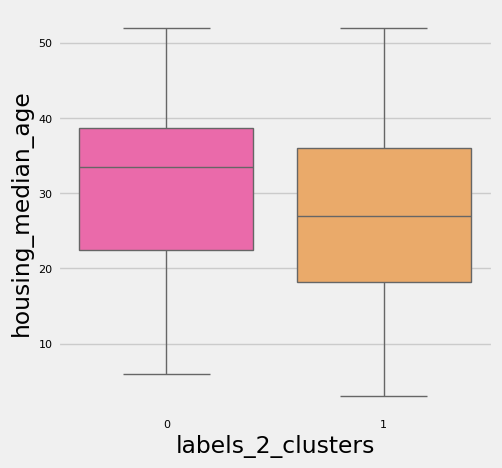

In [145]:
plt.figure(figsize=(5,5))
sns.boxplot(x=cluster_labels[0], y=significant_variables[0], data=cali_df, palette='spring')

/tmp/ipykernel_30671/2021110484.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[0], y=significant_variables[1], data=cali_df, palette='spring')


<Axes: xlabel='labels_2_clusters', ylabel='median_income'>

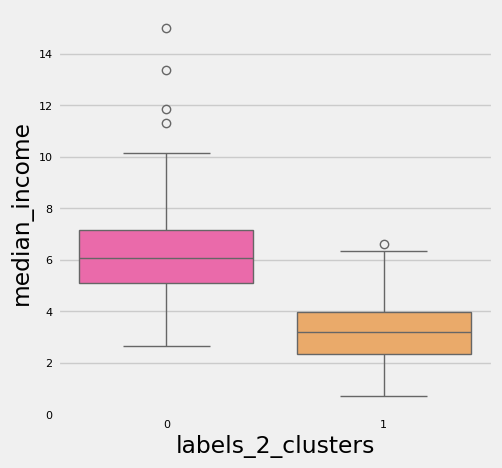

In [146]:
plt.figure(figsize=(5,5))
sns.boxplot(x=cluster_labels[0], y=significant_variables[1], data=cali_df, palette='spring')

/tmp/ipykernel_30671/1593951398.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[0], y=significant_variables[2], data=cali_df, palette='spring')


<Axes: xlabel='labels_2_clusters', ylabel='median_house_value'>

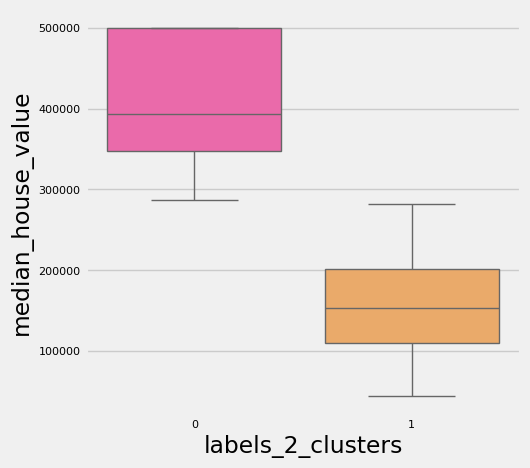

In [147]:
plt.figure(figsize=(5,5))
sns.boxplot(x=cluster_labels[0], y=significant_variables[2], data=cali_df, palette='spring')

/tmp/ipykernel_30671/1442657719.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[1], y=significant_variables[0], data=cali_df, palette='spring')


<Axes: xlabel='labels_3_clusters', ylabel='housing_median_age'>

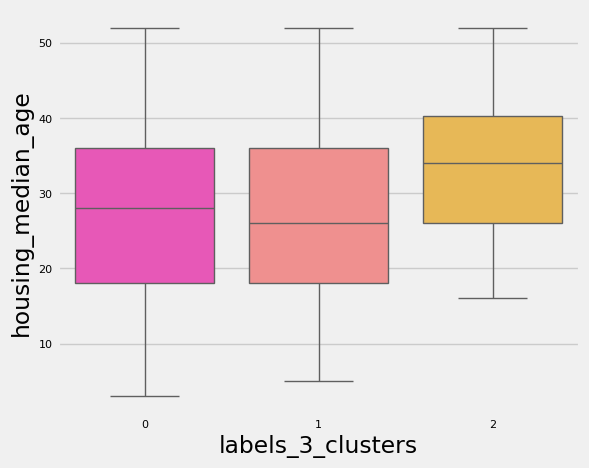

In [148]:
plt.figure(figsize=(6,5))
sns.boxplot(x=cluster_labels[1], y=significant_variables[0], data=cali_df, palette='spring')

/tmp/ipykernel_30671/3902565302.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[1], y=significant_variables[1], data=cali_df, palette='spring')


<Axes: xlabel='labels_3_clusters', ylabel='median_income'>

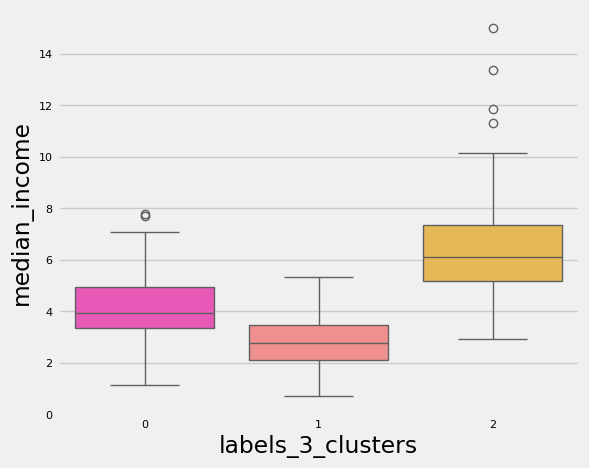

In [150]:
plt.figure(figsize=(6,5))
sns.boxplot(x=cluster_labels[1], y=significant_variables[1], data=cali_df, palette='spring')

/tmp/ipykernel_30671/4235180704.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[1], y=significant_variables[2], data=cali_df, palette='spring')


<Axes: xlabel='labels_3_clusters', ylabel='median_house_value'>

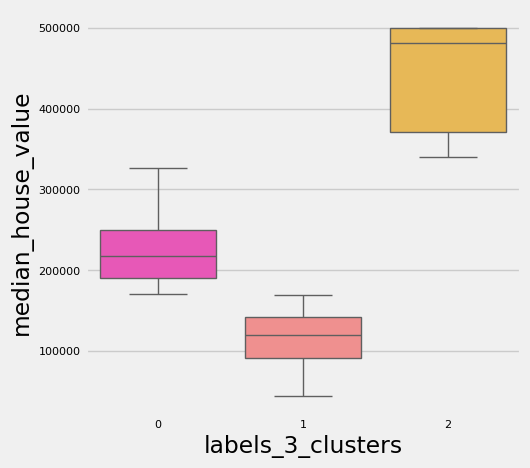

In [151]:
plt.figure(figsize=(5,5))
sns.boxplot(x=cluster_labels[1], y=significant_variables[2], data=cali_df, palette='spring')

/tmp/ipykernel_30671/1537507868.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[2], y=significant_variables[0], data=cali_df, palette='spring')


<Axes: xlabel='labels_4_clusters', ylabel='housing_median_age'>

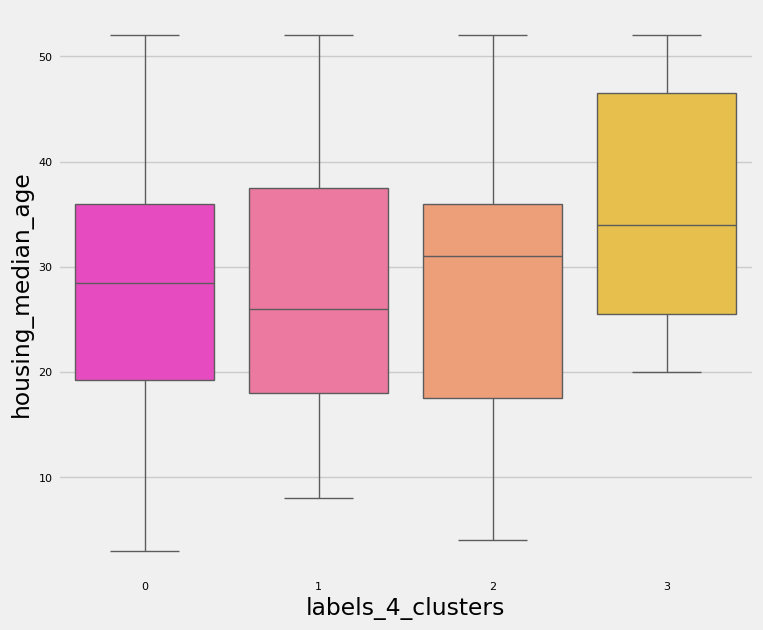

In [152]:
plt.figure(figsize=(8,7))
sns.boxplot(x=cluster_labels[2], y=significant_variables[0], data=cali_df, palette='spring')

/tmp/ipykernel_30671/3682125521.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[2], y=significant_variables[1], data=cali_df, palette='spring')


<Axes: xlabel='labels_4_clusters', ylabel='median_income'>

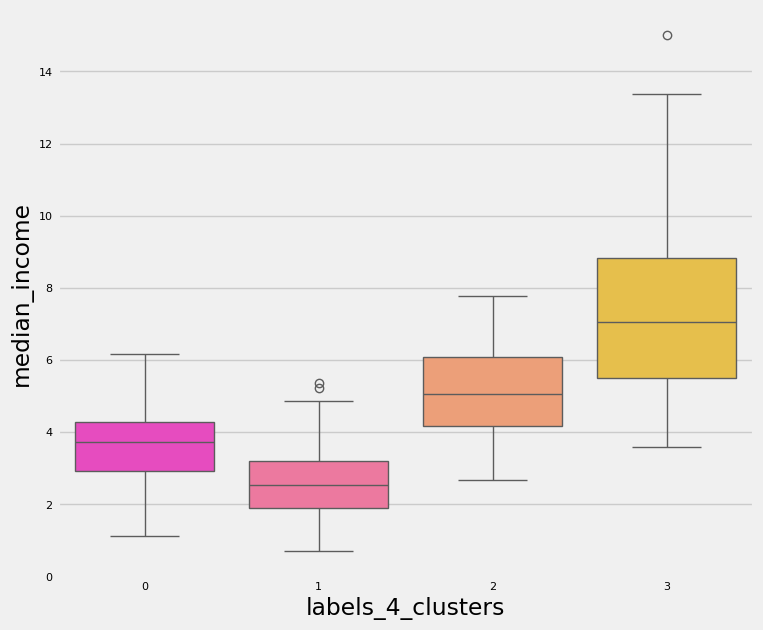

In [155]:
plt.figure(figsize=(8,7))
sns.boxplot(x=cluster_labels[2], y=significant_variables[1], data=cali_df, palette='spring')

/tmp/ipykernel_30671/2477059120.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[2], y=significant_variables[2], data=cali_df, palette='spring')


<Axes: xlabel='labels_4_clusters', ylabel='median_house_value'>

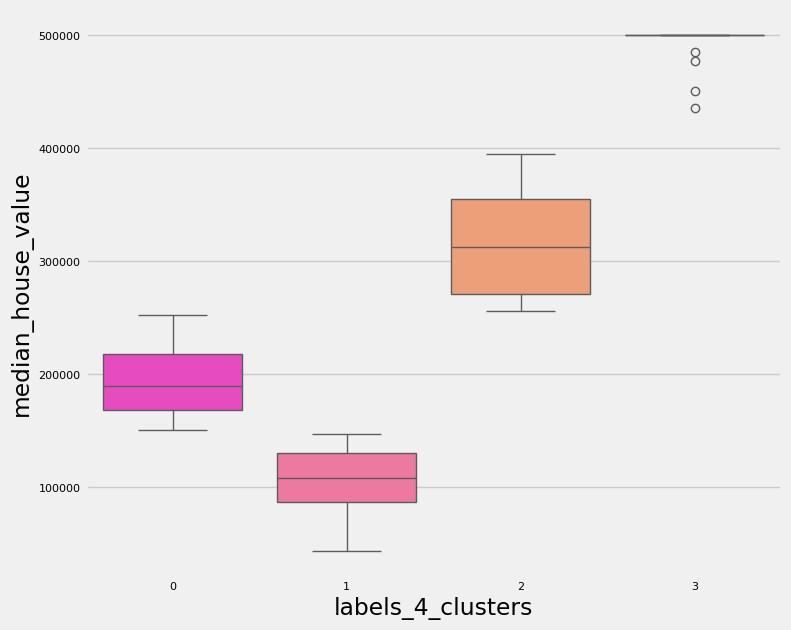

In [153]:
plt.figure(figsize=(8,7))
sns.boxplot(x=cluster_labels[2], y=significant_variables[2], data=cali_df, palette='spring')

### Visuals for scaled significant values

In [169]:
print(significant_variables_scaled_2,'\n', significant_variables_scaled_3,'\n',significant_variables_scaled_4)

['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households'] 
 ['total_rooms', 'median_income', 'median_house_value'] 
 ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']


/tmp/ipykernel_30671/3657912989.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[0], y=significant_variables_scaled_2[0], data=cali_scaled_df, palette='spring')


<Axes: xlabel='labels_2_clusters', ylabel='housing_median_age'>

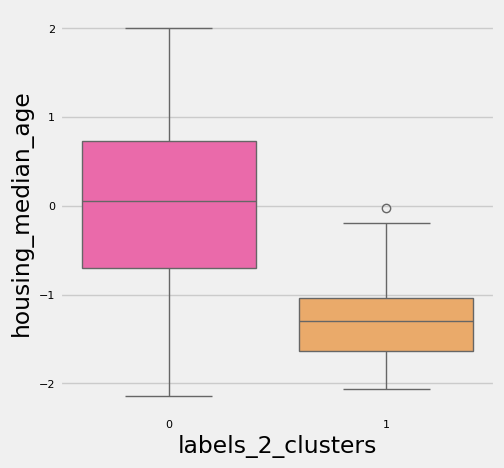

In [170]:
plt.figure(figsize=(5,5))
sns.boxplot(x=cluster_labels[0], y=significant_variables_scaled_2[0], data=cali_scaled_df, palette='spring')

/tmp/ipykernel_30671/363943162.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[0], y=significant_variables_scaled_2[1], data=cali_scaled_df, palette='spring')


<Axes: xlabel='labels_2_clusters', ylabel='total_rooms'>

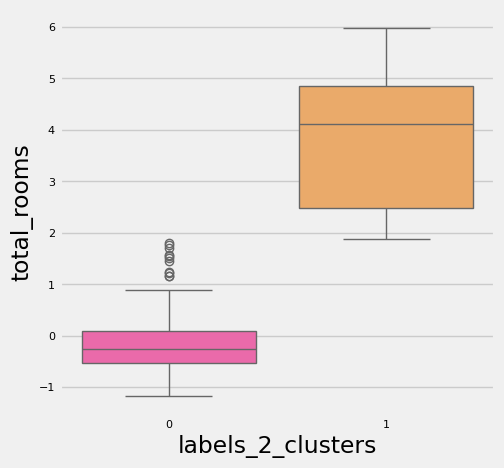

In [171]:
plt.figure(figsize=(5,5))
sns.boxplot(x=cluster_labels[0], y=significant_variables_scaled_2[1], data=cali_scaled_df, palette='spring')

/tmp/ipykernel_30671/3822537569.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[0], y=significant_variables_scaled_2[2], data=cali_scaled_df, palette='spring')


<Axes: xlabel='labels_2_clusters', ylabel='total_bedrooms'>

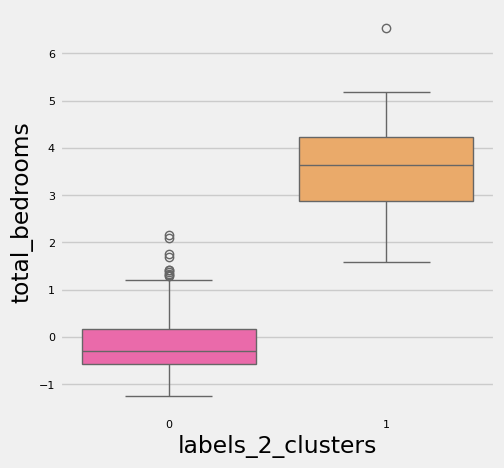

In [172]:
plt.figure(figsize=(5,5))
sns.boxplot(x=cluster_labels[0], y=significant_variables_scaled_2[2], data=cali_scaled_df, palette='spring')

/tmp/ipykernel_30671/1208638977.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[0], y=significant_variables_scaled_2[3], data=cali_scaled_df, palette='spring')


<Axes: xlabel='labels_2_clusters', ylabel='population'>

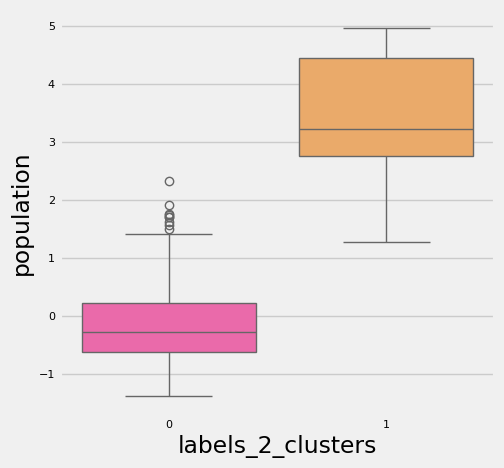

In [173]:
plt.figure(figsize=(5,5))
sns.boxplot(x=cluster_labels[0], y=significant_variables_scaled_2[3], data=cali_scaled_df, palette='spring')

/tmp/ipykernel_30671/436205396.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[0], y=significant_variables_scaled_2[4], data=cali_scaled_df, palette='spring')


<Axes: xlabel='labels_2_clusters', ylabel='households'>

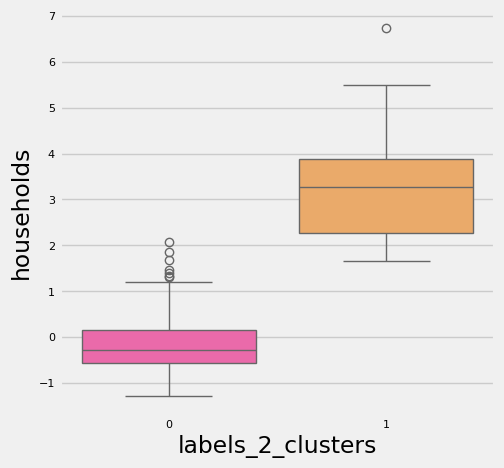

In [174]:
plt.figure(figsize=(5,5))
sns.boxplot(x=cluster_labels[0], y=significant_variables_scaled_2[4], data=cali_scaled_df, palette='spring')

/tmp/ipykernel_30671/1875121503.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[1], y=significant_variables_scaled_3[0], data=cali_scaled_df, palette='spring')


<Axes: xlabel='labels_3_clusters', ylabel='total_rooms'>

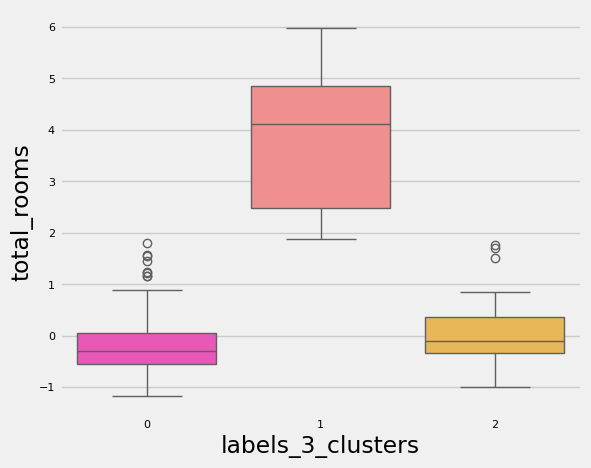

In [179]:
plt.figure(figsize=(6,5))
sns.boxplot(x=cluster_labels[1], y=significant_variables_scaled_3[0], data=cali_scaled_df, palette='spring')

/tmp/ipykernel_30671/1060163005.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[1], y=significant_variables_scaled_3[1], data=cali_scaled_df, palette='spring')


<Axes: xlabel='labels_3_clusters', ylabel='median_income'>

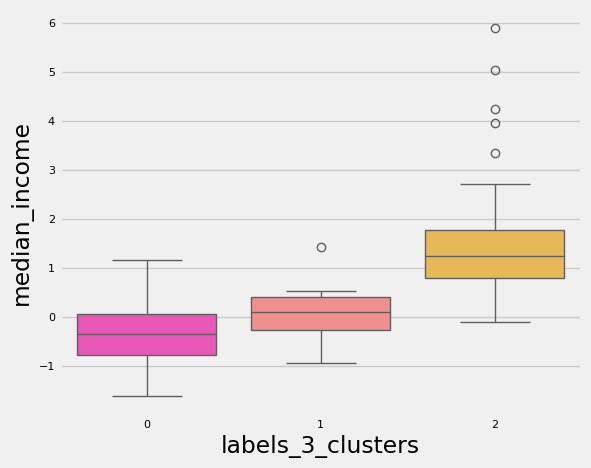

In [180]:
plt.figure(figsize=(6,5))
sns.boxplot(x=cluster_labels[1], y=significant_variables_scaled_3[1], data=cali_scaled_df, palette='spring')

/tmp/ipykernel_30671/226849046.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[1], y=significant_variables_scaled_3[2], data=cali_scaled_df, palette='spring')


<Axes: xlabel='labels_3_clusters', ylabel='median_house_value'>

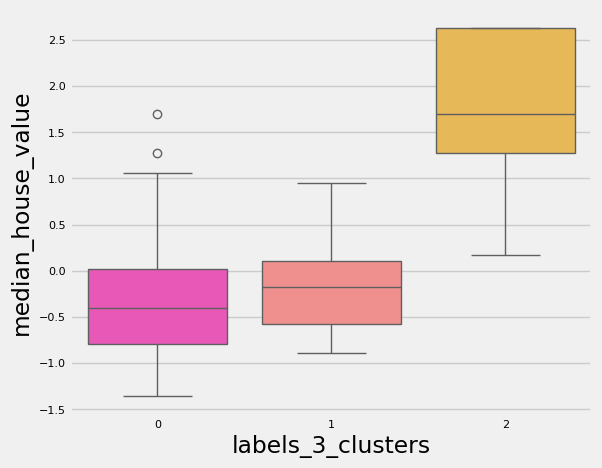

In [181]:
plt.figure(figsize=(6,5))
jsns.boxplot(x=cluster_labels[1], y=significant_variables_scaled_3[2], data=cali_scaled_df, palette='spring')

/tmp/ipykernel_30671/762844203.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[2], y=significant_variables_scaled_4[0], data=cali_scaled_df, palette='spring')


<Axes: xlabel='labels_4_clusters', ylabel='housing_median_age'>

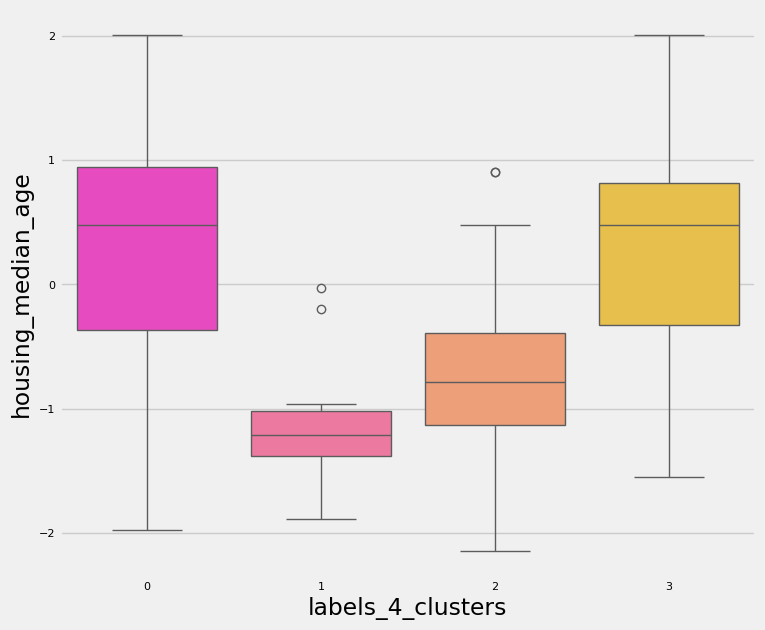

In [182]:
plt.figure(figsize=(8,7))
sns.boxplot(x=cluster_labels[2], y=significant_variables_scaled_4[0], data=cali_scaled_df, palette='spring')

/tmp/ipykernel_30671/1549580076.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[2], y=significant_variables_scaled_4[1], data=cali_scaled_df, palette='spring')


<Axes: xlabel='labels_4_clusters', ylabel='total_rooms'>

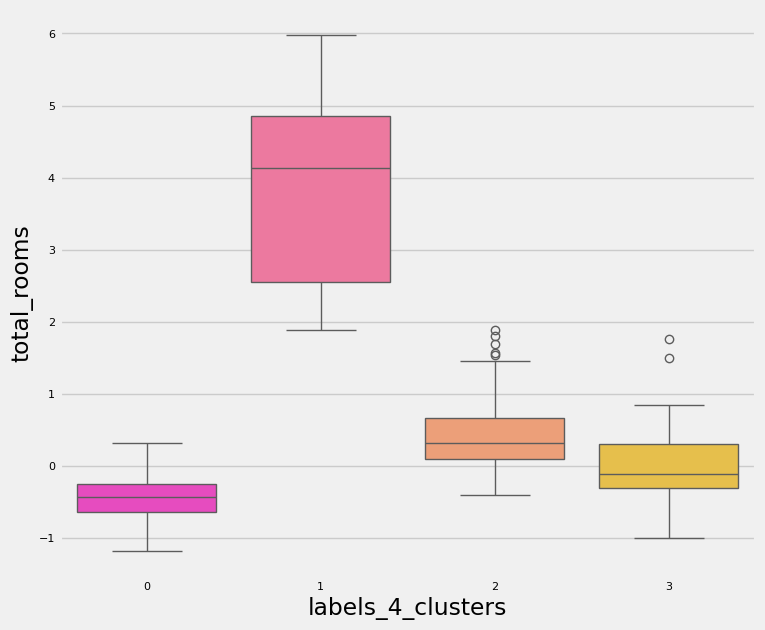

In [183]:
plt.figure(figsize=(8,7))
sns.boxplot(x=cluster_labels[2], y=significant_variables_scaled_4[1], data=cali_scaled_df, palette='spring')

/tmp/ipykernel_30671/3277076281.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[2], y=significant_variables_scaled_4[2], data=cali_scaled_df, palette='spring')


<Axes: xlabel='labels_4_clusters', ylabel='total_bedrooms'>

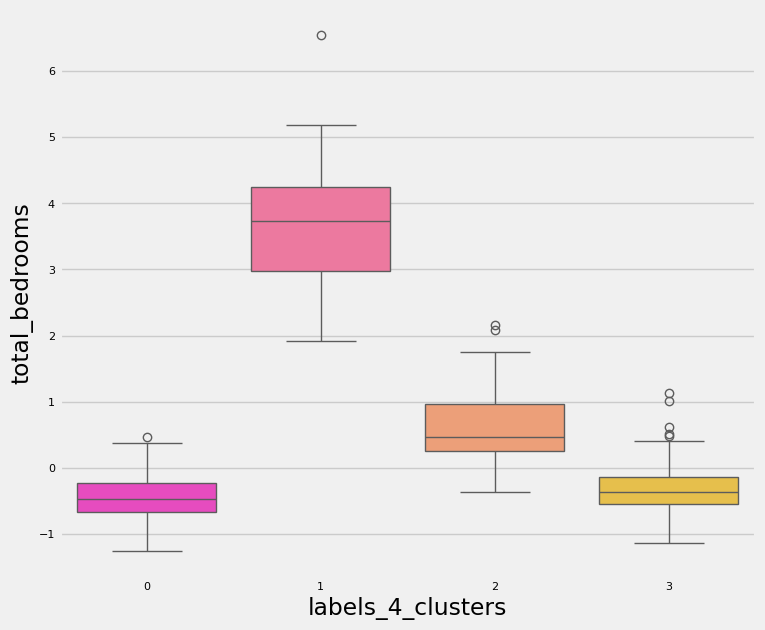

In [184]:
plt.figure(figsize=(8,7))
sns.boxplot(x=cluster_labels[2], y=significant_variables_scaled_4[2], data=cali_scaled_df, palette='spring')

/tmp/ipykernel_30671/1173371978.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[2], y=significant_variables_scaled_4[3], data=cali_scaled_df, palette='spring')


<Axes: xlabel='labels_4_clusters', ylabel='population'>

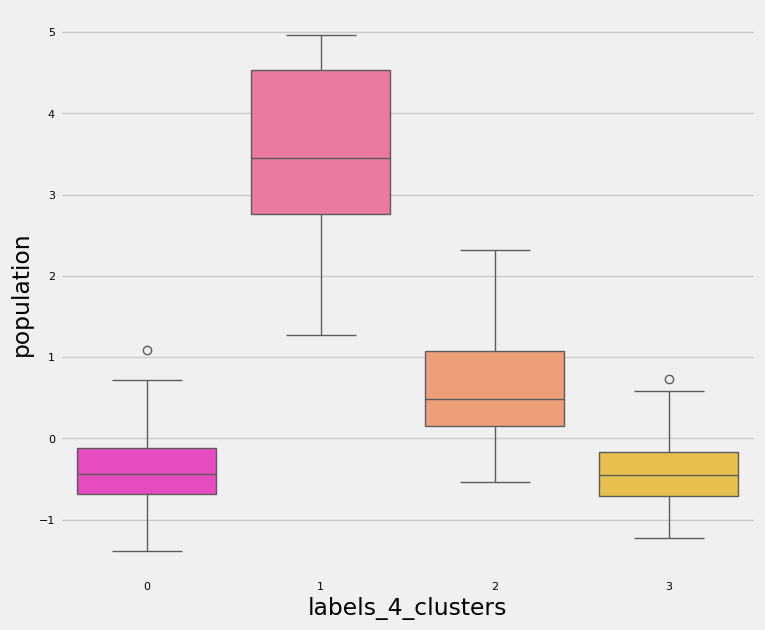

In [185]:
plt.figure(figsize=(8,7))
sns.boxplot(x=cluster_labels[2], y=significant_variables_scaled_4[3], data=cali_scaled_df, palette='spring')

/tmp/ipykernel_30671/2449828661.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[2], y=significant_variables_scaled_4[4], data=cali_scaled_df, palette='spring')


<Axes: xlabel='labels_4_clusters', ylabel='households'>

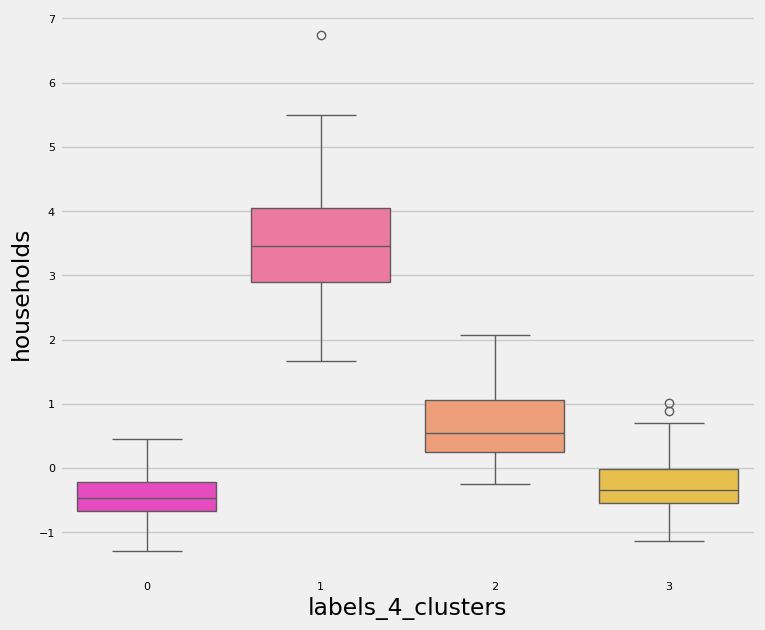

In [186]:
plt.figure(figsize=(8,7))
sns.boxplot(x=cluster_labels[2], y=significant_variables_scaled_4[4], data=cali_scaled_df, palette='spring')

/tmp/ipykernel_30671/3611927411.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[2], y=significant_variables_scaled_4[5], data=cali_scaled_df, palette='spring')


<Axes: xlabel='labels_4_clusters', ylabel='median_income'>

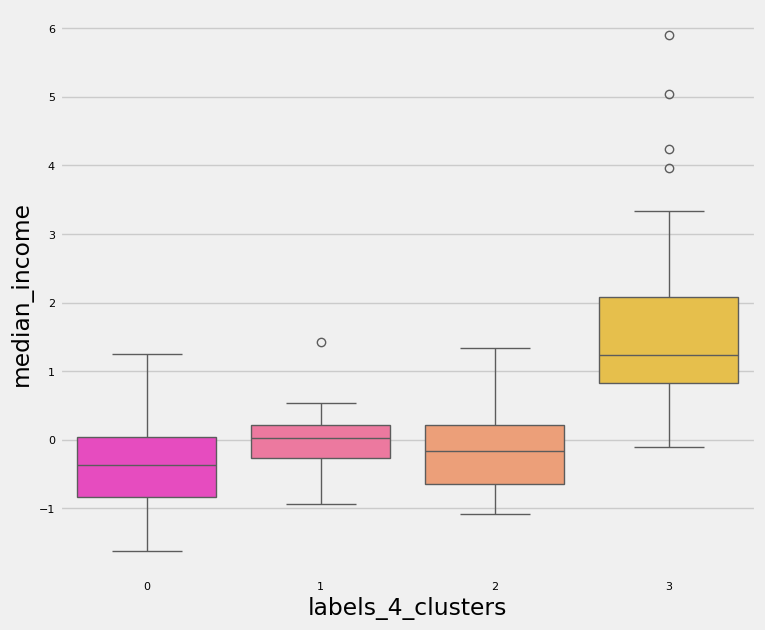

In [187]:
plt.figure(figsize=(8,7))
sns.boxplot(x=cluster_labels[2], y=significant_variables_scaled_4[5], data=cali_scaled_df, palette='spring')

/tmp/ipykernel_30671/700107330.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cluster_labels[2], y=significant_variables_scaled_4[6], data=cali_scaled_df, palette='spring')


<Axes: xlabel='labels_4_clusters', ylabel='median_house_value'>

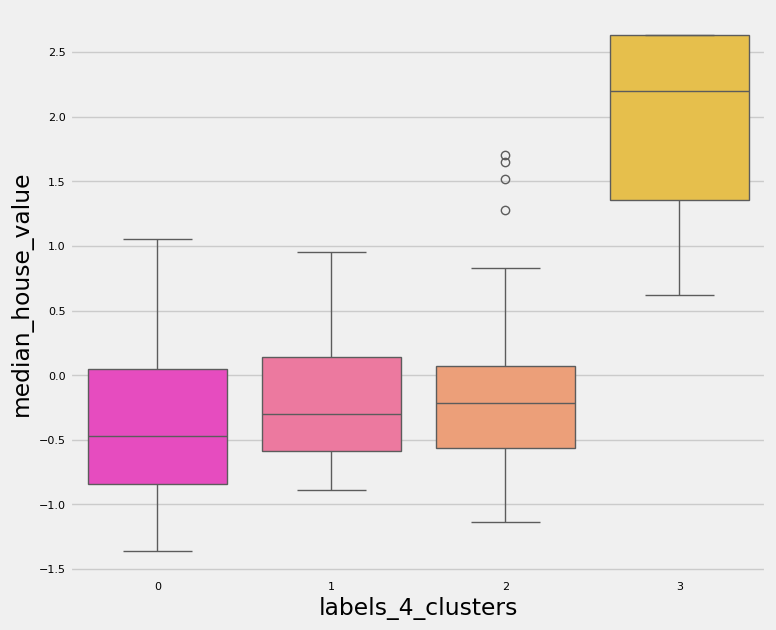

In [188]:
plt.figure(figsize=(8,7))
sns.boxplot(x=cluster_labels[2], y=significant_variables_scaled_4[6], data=cali_scaled_df, palette='spring')